# PS.6 (conjugated gradient)

Explain the notebook myCG.ipynb and address the following aspects: 

a) CG is fast, in particular, faster than SGD.

b) Preconditioning is useful.

c) CG is useful for linear least squares problems, in particular, for sparse matrices.

# PS.6 (iterative schemes)

Consider the equation

$$ 
x+\mathop{ln}(x)=0.
$$

To determine a solution $x_*$, we make use of two iterative schemes.

a) Verify that $x_{n+1} = \mathrm{e}^{-x_n}$ provides locally linear convergence. 

b) Verify that $x_{n+1} = \frac{1}{2}(x_n+\mathrm{e}^{-x_n})$ provides locally linear convergence. 


## Solution

a) The mean-value theorem ensures that there is a unique solution $x_*\in (0,1)$. For $\Phi(x)=\mathrm{e}^{-x}$, we observe that 
$$
\mathop{ln}(x)=-x \quad \Rightarrow\quad x = \mathrm{e}^{-x}.
$$
Therefore, we derive $\Phi(x_*)=x_*$ and we obtain
$$
|\Phi'(x_*)| = \mathrm{e}^{-x_*} = x_* <1.
$$
Corollary 7.1.9 leads to locally linear convergence.

b) For $\Phi(x) = \frac{1}{2}(x+\mathrm{e}^{-x})$, we derive
$$
\mathop{ln}(x)=-x \quad \Rightarrow\quad x = \mathrm{e}^{-x} \quad \Rightarrow\quad \frac{1}{2}(x+\mathrm{e}^{-x}) =x.
$$
Therefore, $\Phi(x_*)=x_*$ and we obtain
$$
|\Phi'(x_*)| = \frac{1}{2}(1-\mathrm{e}^{-x_*}) =\frac{1}{2}(1-x_*)\leq \frac{1}{2}. 
$$
Corollary 7.1.9 leads to locally linear convergence.


# PS.6 (iterative schemes, quadratic convergence)

a) Determine $a\in\mathbb{R}$ such that 
$$
x_{n+1}=\frac{ax_n+\mathrm{e}^{-x_n}}{a+1}
$$ 
is locally convergent of order $2$.

b) We now replace $a$ in part a) by $x_n$. Verify that 
$$
x_{n+1}=\frac{x_nx_n+\mathrm{e}^{-x_n}}{x_n+1}
$$ 
is locally convergent of order $2$. 


## Solution

a) Consider $\Phi(x) = \frac{ax+\mathrm{e}^{-x}}{a+1}$. A fixed point satisfies $x=\frac{ax+\mathrm{e}^{-x}}{a+1}$, which leads to

$$
(a+1)x = ax+\mathrm{e}^{-x}.
$$
We derive $x=\mathrm{e}^{-x}$, which has a solution $x_*$ by the previous exercise.


To apply Corollary 7.1.11, we look for $a$ such that 

$$
0 = \Phi'(x_*) = \frac{a-\mathrm{e}^{-x_*}}{a+1}.
$$

We have already observed that $x_*=\mathrm{e}^{-x_*}$, so that $a=x_*$ leads to locally quadratic convergence. 
(This is useless though, because we do not know $x_*$).

b) It turns out that $x_*$ is also a fixed point of $\Phi(x) =\frac{x^2+\mathrm{e}^{-x}}{x+1}$ since 

$$
\Phi(x_*)=\frac{x_*^2+\mathrm{e}^{-x_*}}{x_*+1} = \frac{x_*^2+x_*}{x_*+1}=\frac{x_*(x_*+1)}{x_*+1}=x_*.
$$


The derivative satisfies

$$
|\Phi'(x_*)| = \frac{(2x_*-\mathrm{e}^{-x_*})(x_*+1) - (x_*^2+\mathrm{e}^{-x_*})}{(x_*+1)^2} 
= \frac{x_*(x_*+1) - (x_*^2+x_*)}{(x_*+1)^2} = 0.
$$

Corollary 7.1.11 ensures quadratic convergence.

# PS.6 (root finding)

Find $x$ such that

\begin{equation*}
f(x) = 0
\end{equation*}

## bisection method

Define $A_0:=[a_0,b_0]:=[a,b]$ and denote $A_n:=[a_n,b_n]$, for $n\in\mathbb{N}$, and
\begin{equation*}
x_n =\frac{a_n+b_n}{2}.
\end{equation*}
If $f(x_n)=0$, then simply $\hat{x}=x_n$. We consider
\begin{equation*}
A_{n+1} : = \begin{cases}
\left[a_n,x_n\right],& f(a_n)f(x_n)<0,\\
\left[x_n,b_n\right],& \text{otherwise}.
\end{cases}
\end{equation*}

a) Implement the bisection method.


In [1]:
function myBisection(f,a,b; tol=1e-12,maxiter=100)
    x = Vector{Float64}(undef, maxiter)   
    for k in 1:maxiter
        x[k] = (a+b)/2
        if abs(f(x[k])) < tol    # stopping criteria
            return x[1:k] 
        end
        if f(a)*f(x[k])<0 
            b = x[k] 
        else 
            a = x[k] 
        end 
    end
    println("no convergence")
    return x
end

myBisection (generic function with 1 method)

In [2]:
f(x) = x^2
a = -1
b = 10
myBisection(f,a,b;maxiter=10)

no convergence


10-element Vector{Float64}:
 4.5
 7.25
 8.625
 9.3125
 9.65625
 9.828125
 9.9140625
 9.95703125
 9.978515625
 9.9892578125

## secant method

Given $x_0$ and $x_1$, define 
\begin{equation}
x_{k+1}:=x_k-f(x_k)\frac{x_k-x_{k-1}}{f(x_k)-f(x_{k-1})}
\end{equation}

b) Implement the secant method.

In [3]:
function mySecant(f, x0, x1; tol=1e-5, maxiter=50)
    x = Vector{Float64}(undef,maxiter)
    x[1] = x0
    x[2] = x1
    for k in 2:maxiter-1
        x[k+1] = x[k]-f(x[k])*(x[k]-x[k-1])/(f(x[k])-f(x[k-1]))
        if abs(f(x[k+1])) < tol
            return x[1:k+1] 
        end
    end
    println("no convergence")
    return x
end

mySecant (generic function with 1 method)

## Newton's method

Given $x_0$, define 

\begin{equation}
x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}
\end{equation}

c) Implement the Newton's method.

In [4]:
function myNewton(f, ∂f, x0; tol=1e-8, maxiter=50)
    x = Vector{Float64}(undef,maxiter)
    x[1] = copy(x0)
    for k in 1:maxiter-1
        if abs(f(x[k]))<tol return x[1:k] end
        x[k+1] = x[k]-f(x[k])/∂f(x[k])
    end
    println("no convergence")
    return x
end

myNewton (generic function with 1 method)

## Tests for root finding

d) Run the tests and explain the plots.

In [6]:
using Test
using Calculus:derivative   # makes the function "derivative" from the package Calculus visible. "using Calculus" would make all functions from Calculus visible. 
@testset "myRoots" begin     # if you did not return all iterates, then you need to remove "[end]" in the following expressions
    for k in 2:5
        f(x) = x^2-k
        x̂1 = myBisection(f, 1, k; tol = 1e-6)
        x̂2 = mySecant(f, 1, k)
        @test abs(f(x̂1[end])) < 1e-5
        @test abs(f(x̂2[end])) < 1e-5

        ∂f = derivative(f)
        x̂3 = myNewton(f, ∂f, 1)
        @test abs(f(x̂3[end])) < 1e-5
    end
end

Test Summary: | Pass  Total  Time
myRoots       |   12     12  0.2s


Test.DefaultTestSet("myRoots", Any[], 12, false, false, true, 1.669120505405741e9, 1.669120505575087e9)

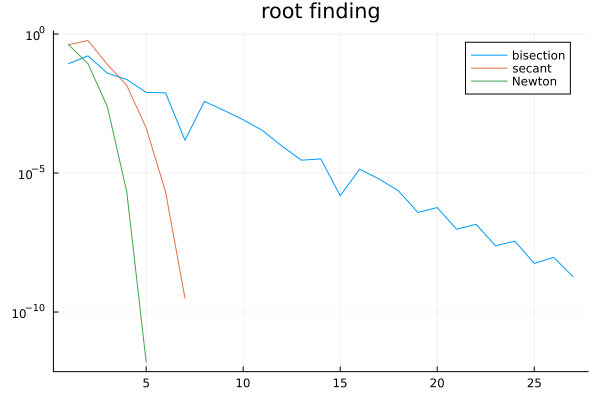

In [7]:
using Plots:plot,plot!   
f(x) = x^2-2
z = sqrt(2)
X = myBisection(f, 1, 2; tol = 1e-8, maxiter = 4_000)
Y = mySecant(f, 1, 2; tol = 1e-8, maxiter = 4_000)
Z = myNewton(f, derivative(f), 1; tol = 1e-8, maxiter = 4_000)
plot(abs.(X.-z),yaxis=:log, title = "root finding", label = "bisection")   # if you did not return all iterates, then you need to make changes
plot!(abs.(Y.-z),yaxis=:log, label = "secant")
plot!(abs.(Z.-z),yaxis=:log, label = "Newton")